In [1]:
# Install
install.packages("tm")  # for text mining
install.packages("SnowballC") # for text stemming
install.packages("wordcloud") # word-cloud generator 
install.packages("RColorBrewer") # color palettes

Installing package into 'C:/Users/hv/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

Warning message in readRDS(dest):
"lzma decoding result 10"
also installing the dependencies 'NLP', 'slam'




package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hv\AppData\Local\Temp\Rtmp00CWGs\downloaded_packages


Installing package into 'C:/Users/hv/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'SnowballC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hv\AppData\Local\Temp\Rtmp00CWGs\downloaded_packages


Installing package into 'C:/Users/hv/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hv\AppData\Local\Temp\Rtmp00CWGs\downloaded_packages


Installing package into 'C:/Users/hv/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hv\AppData\Local\Temp\Rtmp00CWGs\downloaded_packages


In [2]:
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Loading required package: NLP

Loading required package: RColorBrewer



In [4]:
text <- readLines('Cung cap buoi 7/introduction_to_DS_MK.txt')

In [5]:
# Load the data as a corpus
docs <- Corpus(VectorSource(text))

In [6]:
# Inspect the content of the document
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Professor Caldwell explains that marketing data science allows organizations to invest wisely and get the biggest bang for their buck, rather than just hypothesizing. The investment is worthwhile and answers the following questions:                                                                                                                      
[2] Where are our customer touch points in an online environment and brick and mortar stores?                                                                                                                                                                                                                                                                     
[3] What data should we identify and analyze?                                                                                                                                                 

In [7]:
# Text transformation
# Transformation is performed using tm_map() function to replace, for example, special characters from the text.
# Replacing “/”, “@” and “|” with space:
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")

Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
"transformation drops documents"


In [8]:
stopwords("english")

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [9]:
# Cleaning the text
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove your own stop word
# specify your stopwords as a character vector
docs <- tm_map(docs, removeWords, c("then", "just", "more", "")) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, c("then", "just", "more", :
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"


In [11]:
# Build a term-document matrix
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

,word,freq
,<chr>,<dbl>
data,data,5
marketing,marketing,4
science,science,3
caldwell,caldwell,2
invest,invest,2
professor,professor,2
customer,customer,2
allows,allows,1
answers,answers,1


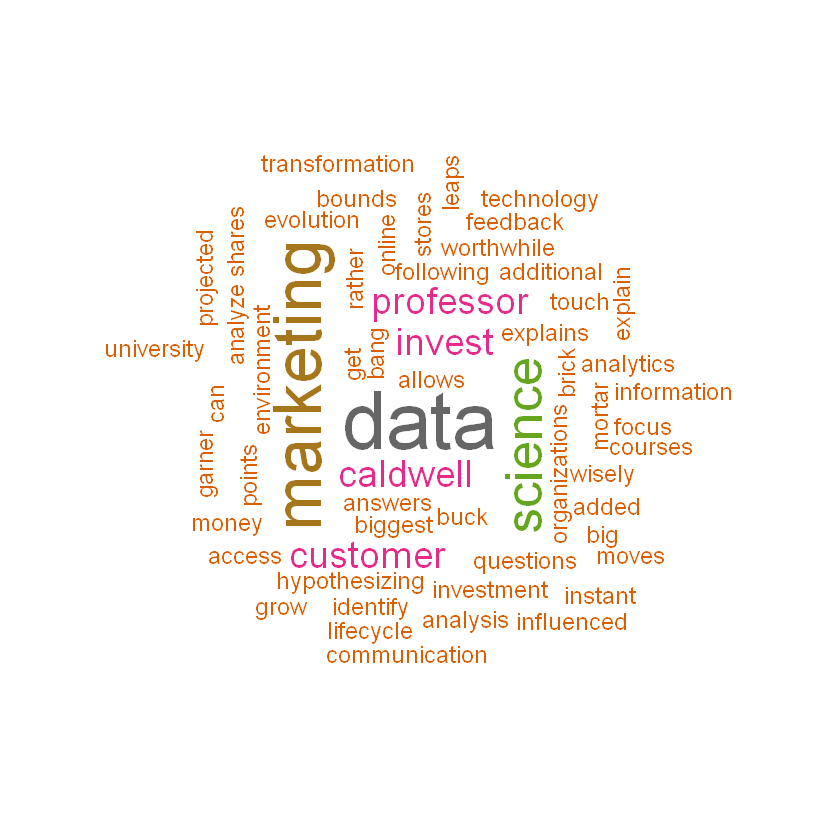

In [12]:
# Generate the Word cloud
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

# Explore frequent terms and their associations

In [13]:
findFreqTerms(dtm, lowfreq = 3)

[1] "data"      "marketing" "science"

In [15]:
findAssocs(dtm, terms = "data", corlimit = 0.5)

$data
     marketing        science         access          added      analytics 
          0.94           0.91           0.91           0.91           0.91 
           big         bounds  communication        courses      evolution 
          0.91           0.91           0.91           0.91           0.91 
       explain          focus           grow     influenced    information 
          0.91           0.91           0.91           0.91           0.91 
       instant          leaps          moves      projected         shares 
          0.91           0.91           0.91           0.91           0.91 
    technology transformation     university       caldwell      professor 
          0.91           0.91           0.91           0.75           0.75

In [16]:
head(d, 10)

,word,freq
,<chr>,<dbl>
data,data,5
marketing,marketing,4
science,science,3
caldwell,caldwell,2
invest,invest,2
professor,professor,2
customer,customer,2
allows,allows,1
answers,answers,1


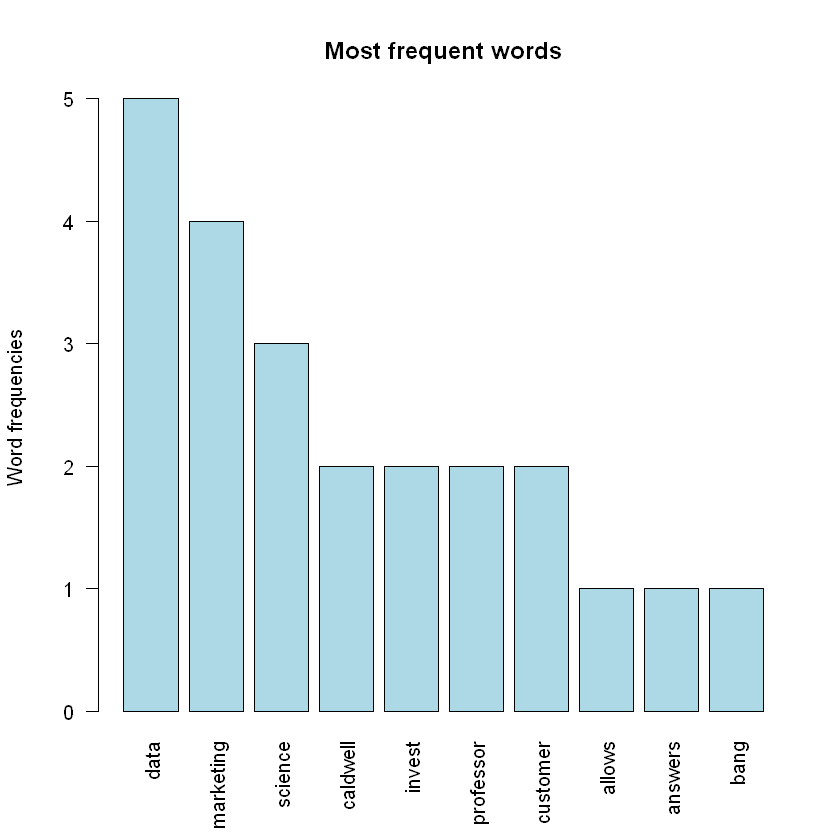

In [17]:
# Plot word frequencies
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

In [18]:
# http://www.sthda.com/english/wiki/word-cloud-generator-in-r-one-killer-function-to-do-everything-you-need